#### Importining Necessary Packages

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler , LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,  GridSearchCV
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from keras.models import Sequential
from keras.layers import Dense
from sklearn.feature_selection import SelectKBest, chi2,  f_classif
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


2024-12-31 10:33:36.804181: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-31 10:33:36.947536: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-31 10:33:36.950072: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-31 10:33:38.432422: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### Data Loading and Preprocessing

In [ ]:
df=pd.read_csv("/dataset.csv")

In [ ]:
df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [ ]:
df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [ ]:
df.shape

(958524, 45)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


In [ ]:
df = df.drop(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix'],axis=1)

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())





In [ ]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].fillna(df[i].mode()[0])

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
H,958524.0,1.690641e+01,1.784546e+00,-1.100000e+00,1.610000e+01,1.690000e+01,1.770000e+01,3.320000e+01
diameter,958524.0,5.506429e+00,3.552949e+00,2.500000e-03,5.506429e+00,5.506429e+00,5.506429e+00,9.394000e+02
albedo,958524.0,1.306272e-01,4.141854e-02,1.000000e-03,1.306272e-01,1.306272e-01,1.306272e-01,1.000000e+00
diameter_sigma,958524.0,4.791844e-01,2.949847e-01,5.000000e-04,4.791844e-01,4.791844e-01,4.791844e-01,1.400000e+02
epoch,958524.0,2.458869e+06,7.016716e+02,2.425052e+06,2.459000e+06,2.459000e+06,2.459000e+06,2.459000e+06
epoch_mjd,958524.0,5.886878e+04,7.016716e+02,2.505100e+04,5.900000e+04,5.900000e+04,5.900000e+04,5.900000e+04
epoch_cal,958524.0,2.019693e+07,1.930354e+04,1.927062e+07,2.020053e+07,2.020053e+07,2.020053e+07,2.020053e+07
e,958524.0,1.561163e-01,9.264264e-02,0.000000e+00,9.219296e-02,1.450017e-01,2.006503e-01,1.855356e+00
a,958524.0,2.902143e+00,3.971950e+01,-1.470245e+04,2.387835e+00,2.646969e+00,3.001932e+00,3.348890e+04
q,958524.0,2.394887e+00,2.139246e+00,7.051073e-02,1.971401e+00,2.225816e+00,2.578315e+00,8.039882e+01


In [ ]:
df.isnull().sum()

neo               0
pha               0
H                 0
diameter          0
albedo            0
diameter_sigma    0
orbit_id          0
epoch             0
epoch_mjd         0
epoch_cal         0
equinox           0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                0
ad                0
n                 0
tp                0
tp_cal            0
per               0
per_y             0
moid              0
moid_ld           0
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
class             0
rms               0
dtype: int64

In [ ]:
print(df['class'].value_counts())

class
MBA    855954
OMB     28355
IMB     20360
MCA     18685
APO     12687
AMO      8457
TJN      8221
TNO      3468
ATE      1729
CEN       506
AST        76
IEO        22
HYA         4
Name: count, dtype: int64


In [ ]:

def map_to_class(value):
    if value in ['MBA']:  # Class 1
        return 1
    elif value in ['OMB']:  # Class 2
        return 2
    elif value in ['IMB', 'MCA', 'APO', 'AMO', 'TJN']:  # Class 3
        return 3
    elif value in ['TNO', 'ATE', 'CEN', 'AST', 'IEO', 'HYA']:  # Class 4
        return 4
    else:
        return 0

df['target_class'] = df['class'].apply(map_to_class)


df = df.drop('class', axis=1)


df.head()


,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms,target_class
0,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.43301,1
1,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,0.35936,1
2,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,0.33848,1
3,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,0.39980,1
4,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,0.52191,1


In [ ]:
print(df['target_class'].value_counts())

target_class
1    855954
3     68410
2     28355
4      5805
Name: count, dtype: int64


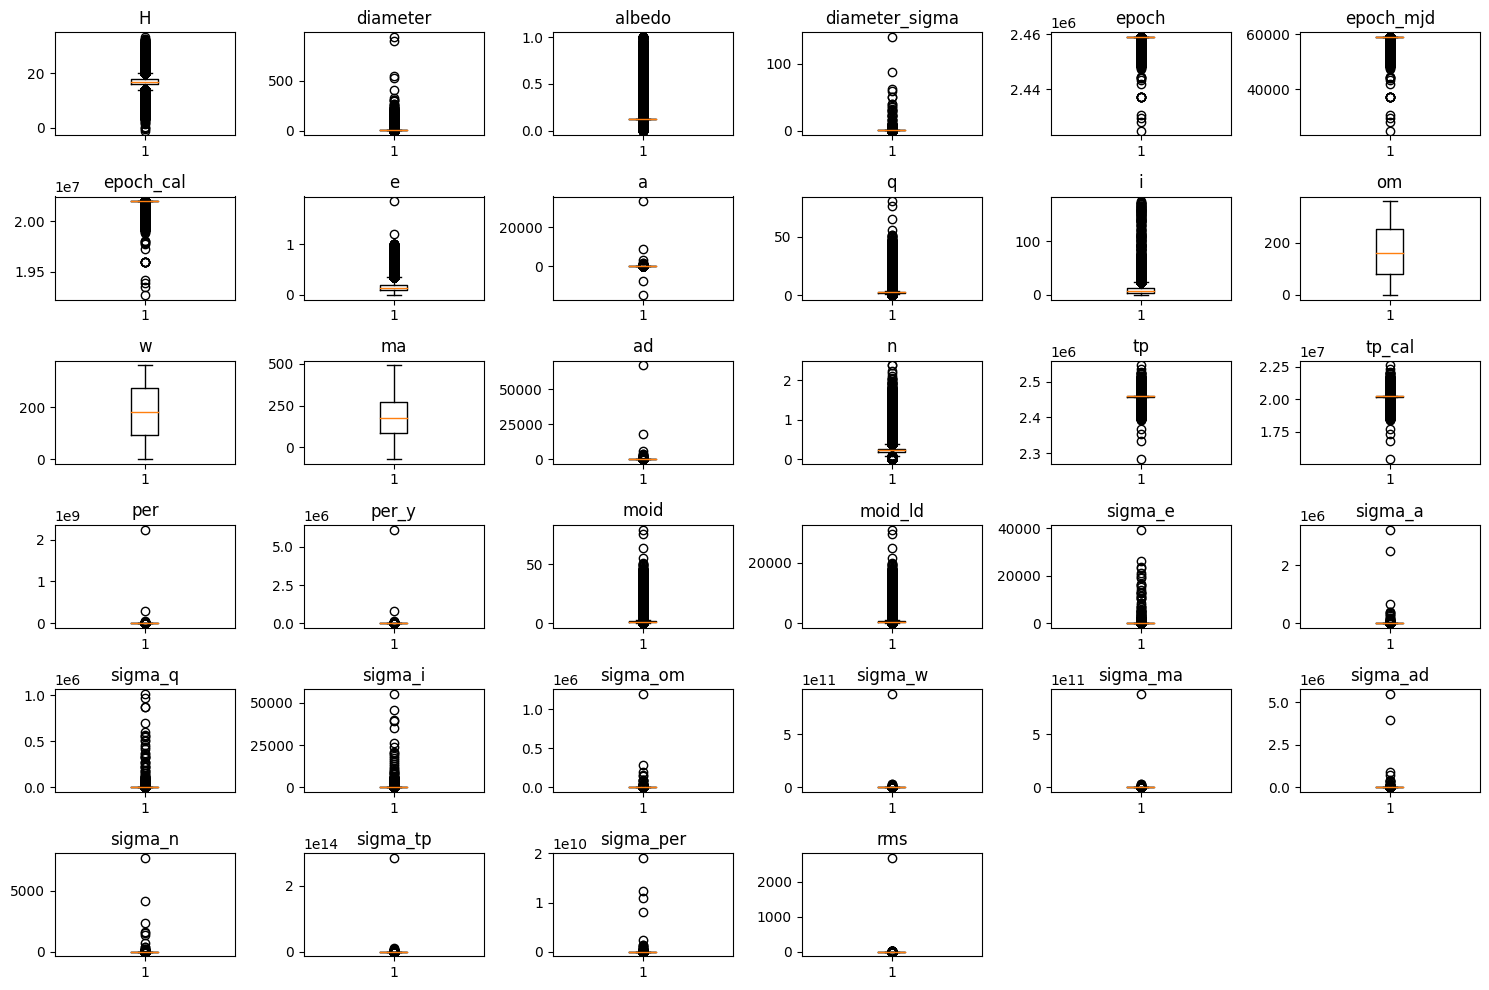

In [ ]:


# List of numerical columns (excluding target class)
numerical_columns = ['H', 'diameter', 'albedo', 'diameter_sigma', 'epoch', 'epoch_mjd', 'epoch_cal', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms']

# Plot boxplots for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(6, 6, i+1)
    plt.boxplot(data=df, x=column)
    plt.title(column)
plt.tight_layout()
plt.show()


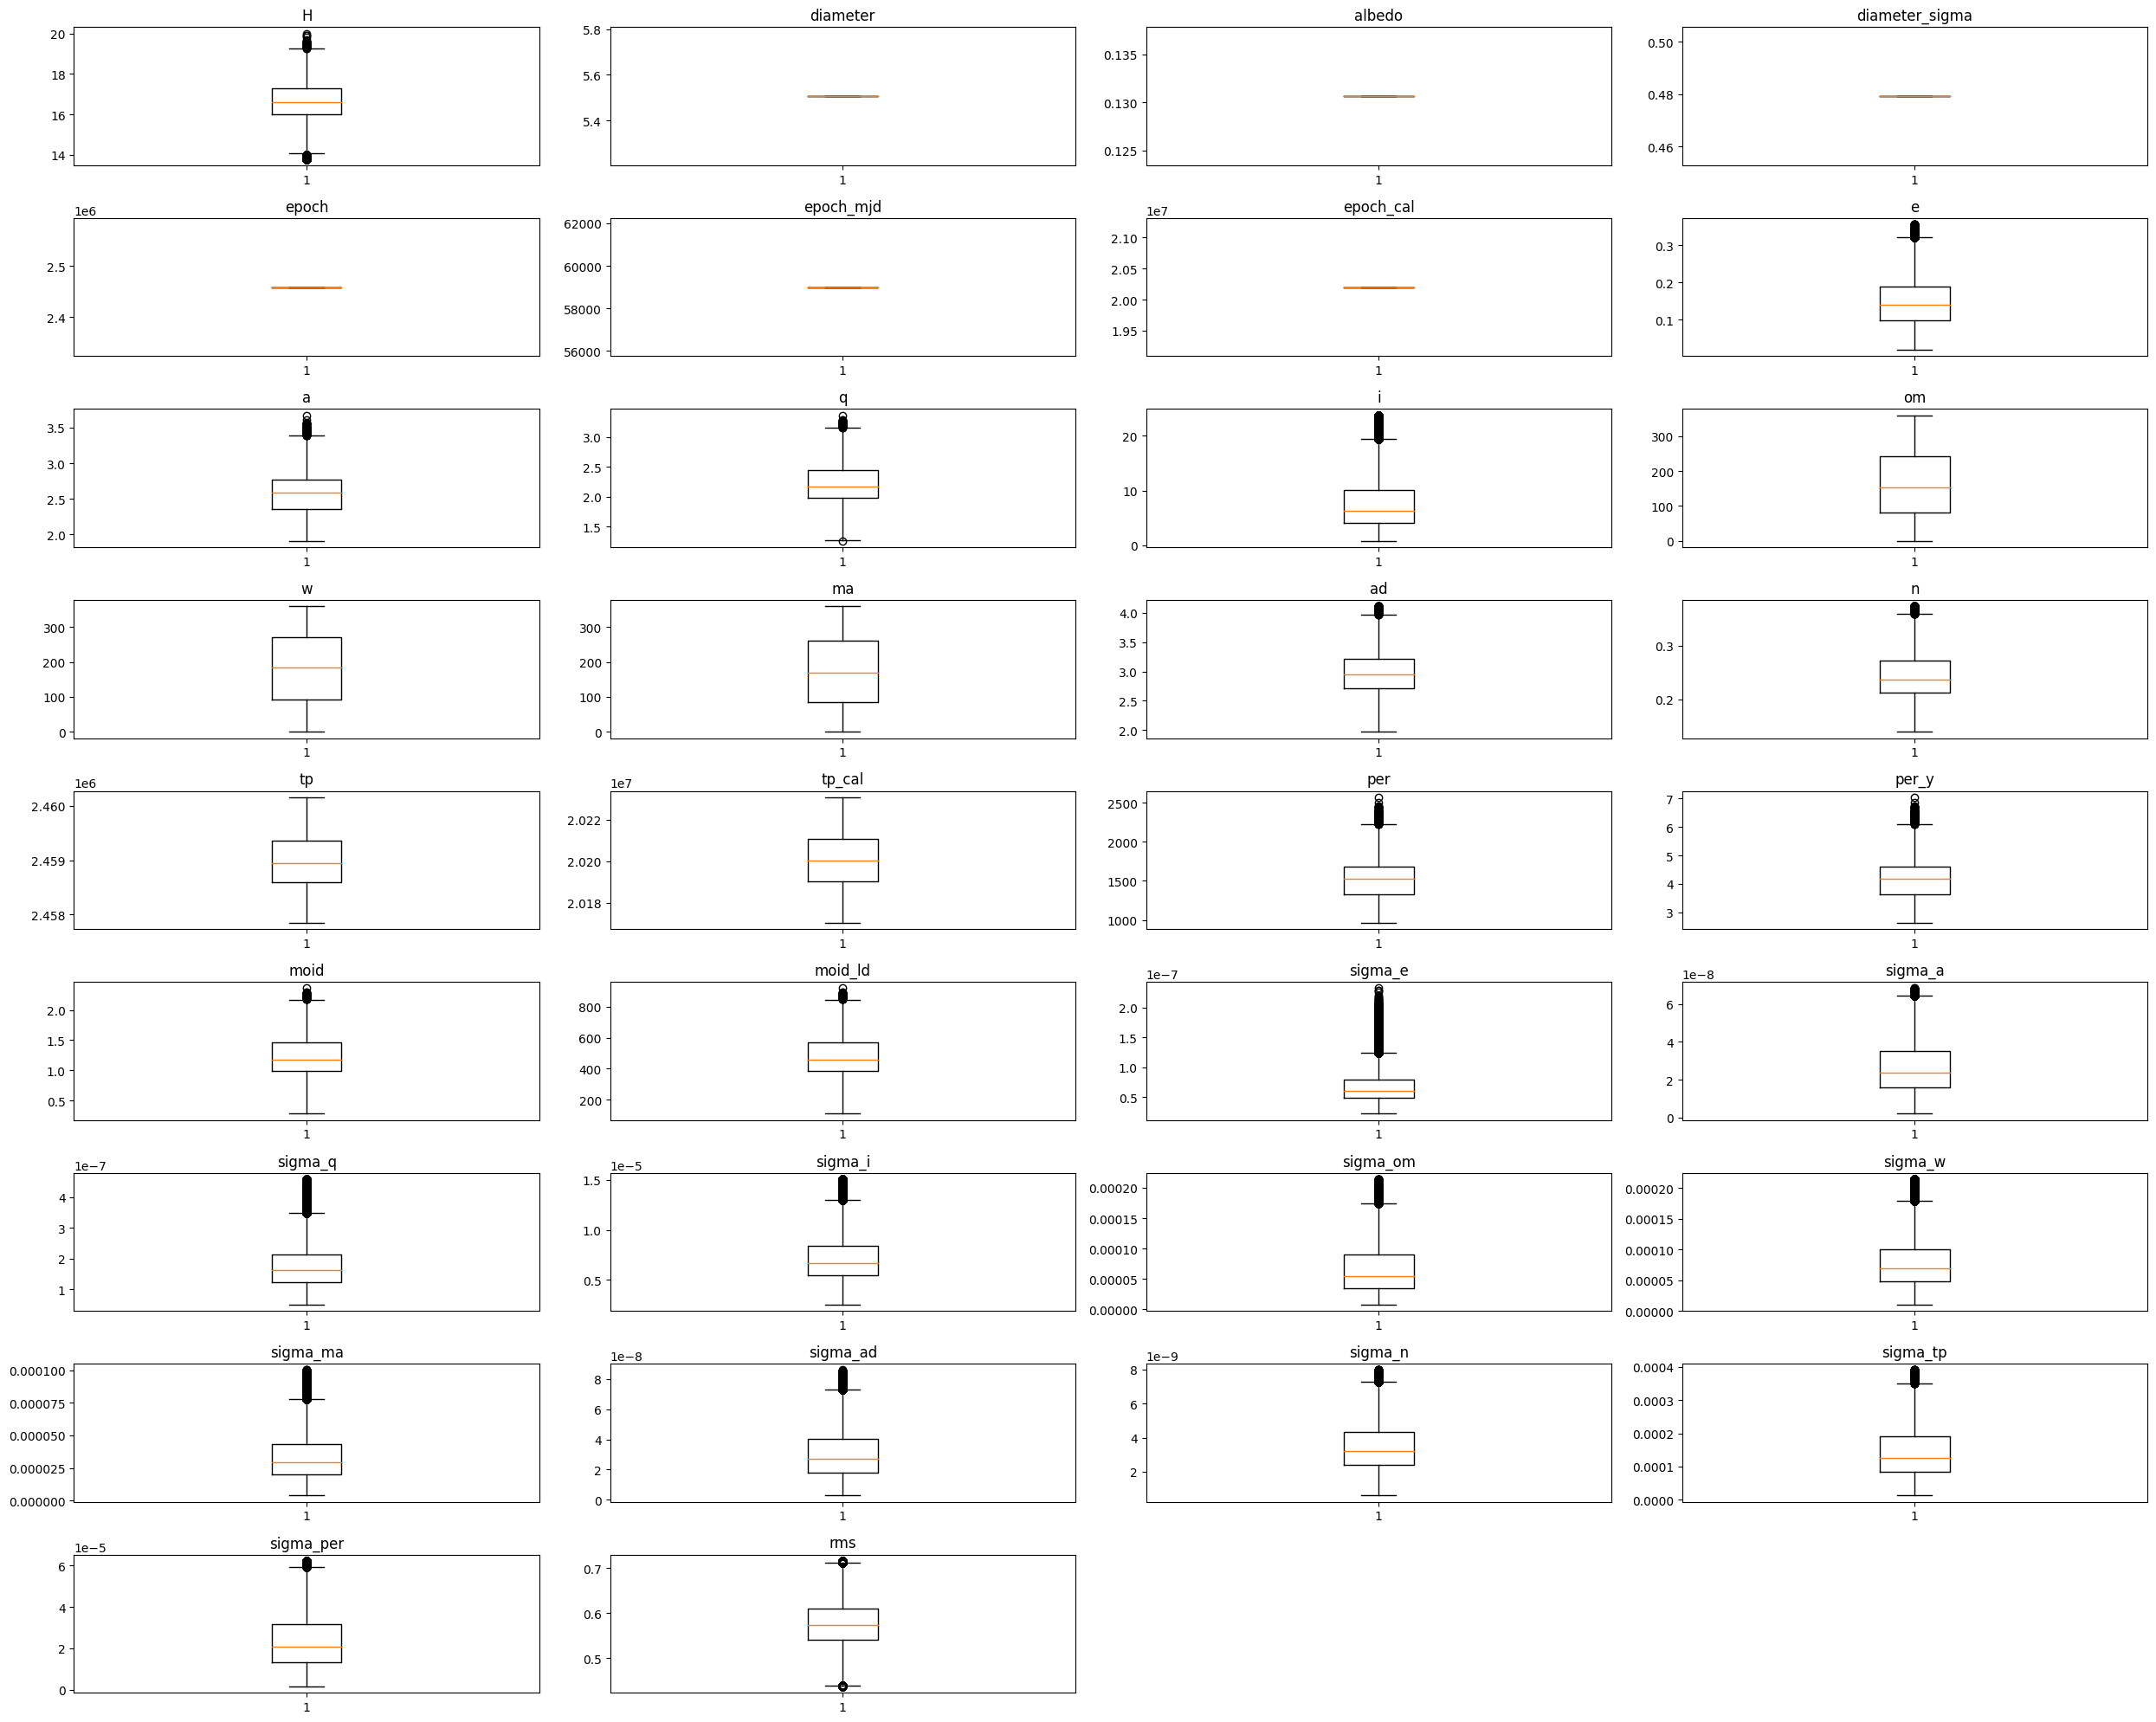

In [ ]:

# Function to remove outliers based on IQR method
def remove_outliers(df, numerical_columns):
    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter rows where the value is within the bounds
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

# Remove outliers
df_no_outliers = remove_outliers(df, numerical_columns)


plt.figure(figsize=(25, 20))


num_rows = (len(numerical_columns) + 3) // 4
for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, 4, i+1)
    plt.boxplot(data=df_no_outliers, x=column)
    plt.title(column)

plt.tight_layout()
plt.show()

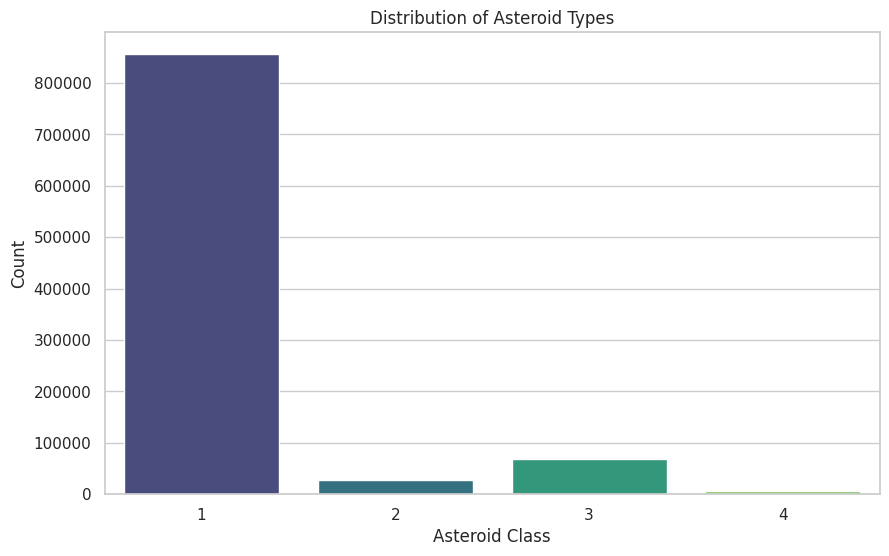

In [ ]:
sns.set(style='whitegrid')

# 1. Bar Chart for Distribution of a Categorical Feature (e.g., 'class')
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='target_class', palette='viridis')
plt.title('Distribution of Asteroid Types')
plt.xlabel('Asteroid Class')
plt.ylabel('Count')
plt.show()

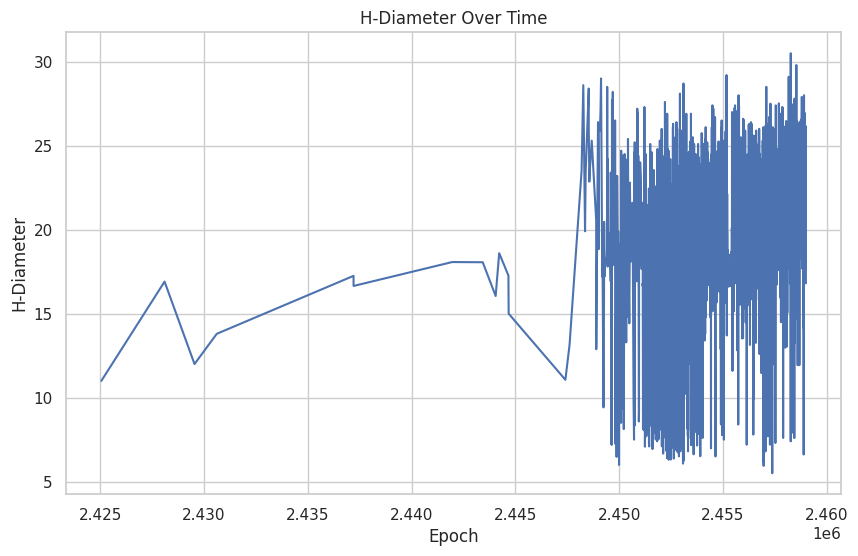

In [ ]:
# 2. Line Chart for a Numerical Feature Over Time (e.g., 'epoch' if it represents time)
# Note: Replace 'epoch' with a relevant time feature if applicable
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='epoch', y='H', ci=None)
plt.title('H-Diameter Over Time')
plt.xlabel('Epoch')
plt.ylabel('H-Diameter')
plt.show()


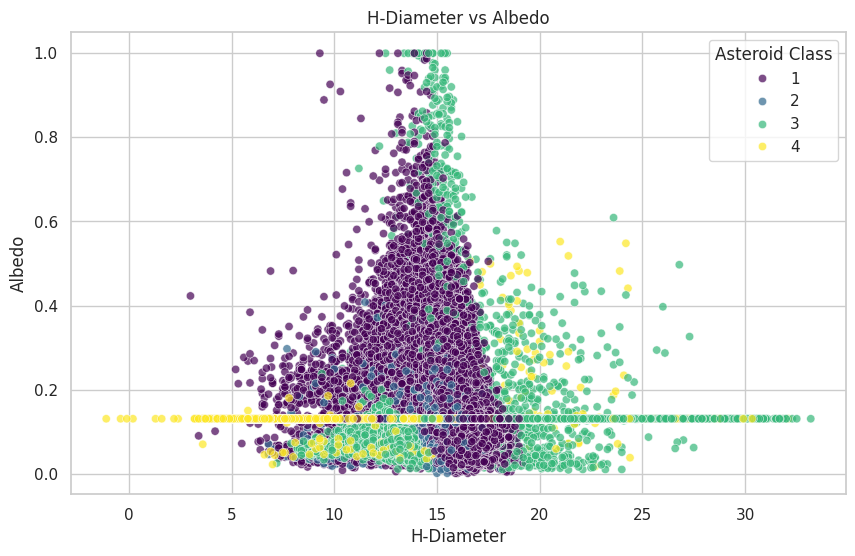

In [ ]:
# 3. Scatter Plot to visualize relationship between 'H' and 'albedo'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='H', y='albedo', hue='target_class', palette='viridis', alpha=0.7)
plt.title('H-Diameter vs Albedo')
plt.xlabel('H-Diameter')
plt.ylabel('Albedo')
plt.legend(title='Asteroid Class')
plt.show()

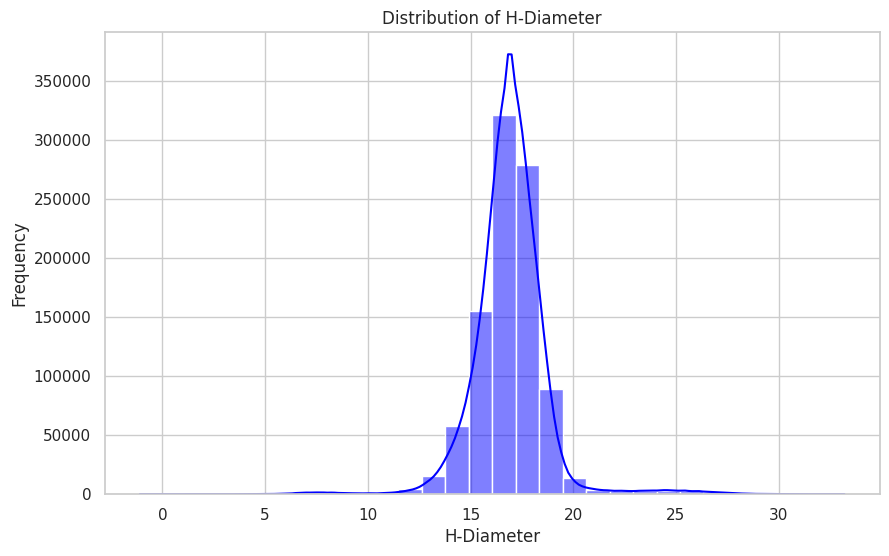

In [ ]:
# 4. Distribution Plot for a Numerical Feature (e.g., 'H')
plt.figure(figsize=(10, 6))
sns.histplot(data=df['H'], bins=30, kde=True, color='blue')
plt.title('Distribution of H-Diameter')
plt.xlabel('H-Diameter')
plt.ylabel('Frequency')
plt.show()

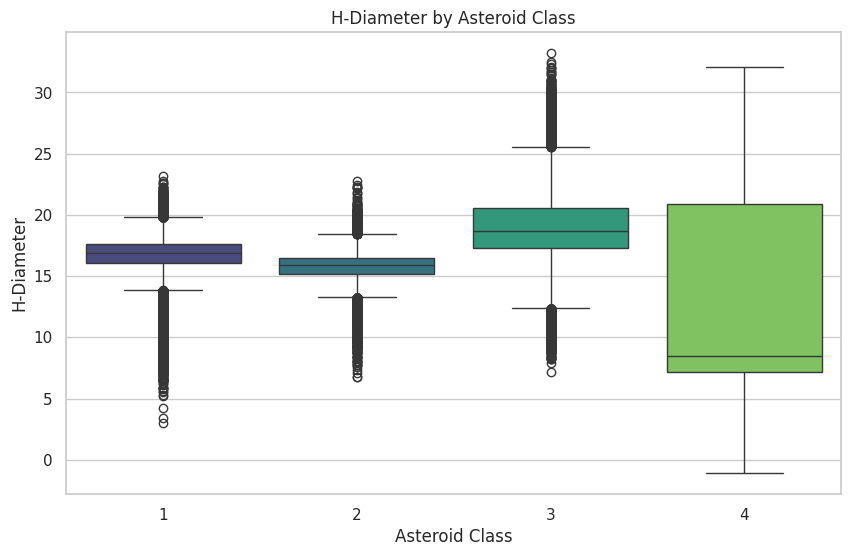

In [ ]:
# 5. Box Plot to show spread and outliers for 'H'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target_class', y='H', palette='viridis')
plt.title('H-Diameter by Asteroid Class')
plt.xlabel('Asteroid Class')
plt.ylabel('H-Diameter')
plt.show()

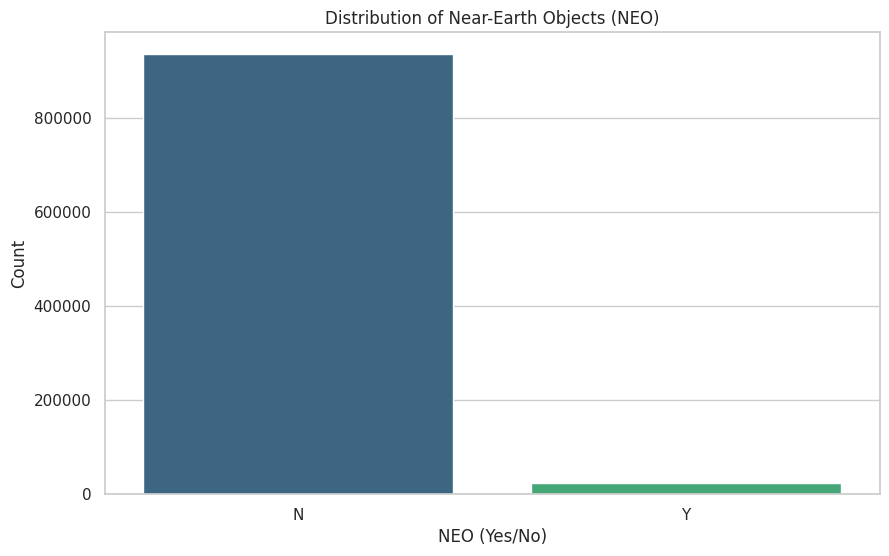

In [ ]:
#  6. Bar Chart for Distribution of a Categorical Feature (e.g., 'neo' - Near-Earth Object)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='neo', palette='viridis')
plt.title('Distribution of Near-Earth Objects (NEO)')
plt.xlabel('NEO (Yes/No)')
plt.ylabel('Count')
plt.show()

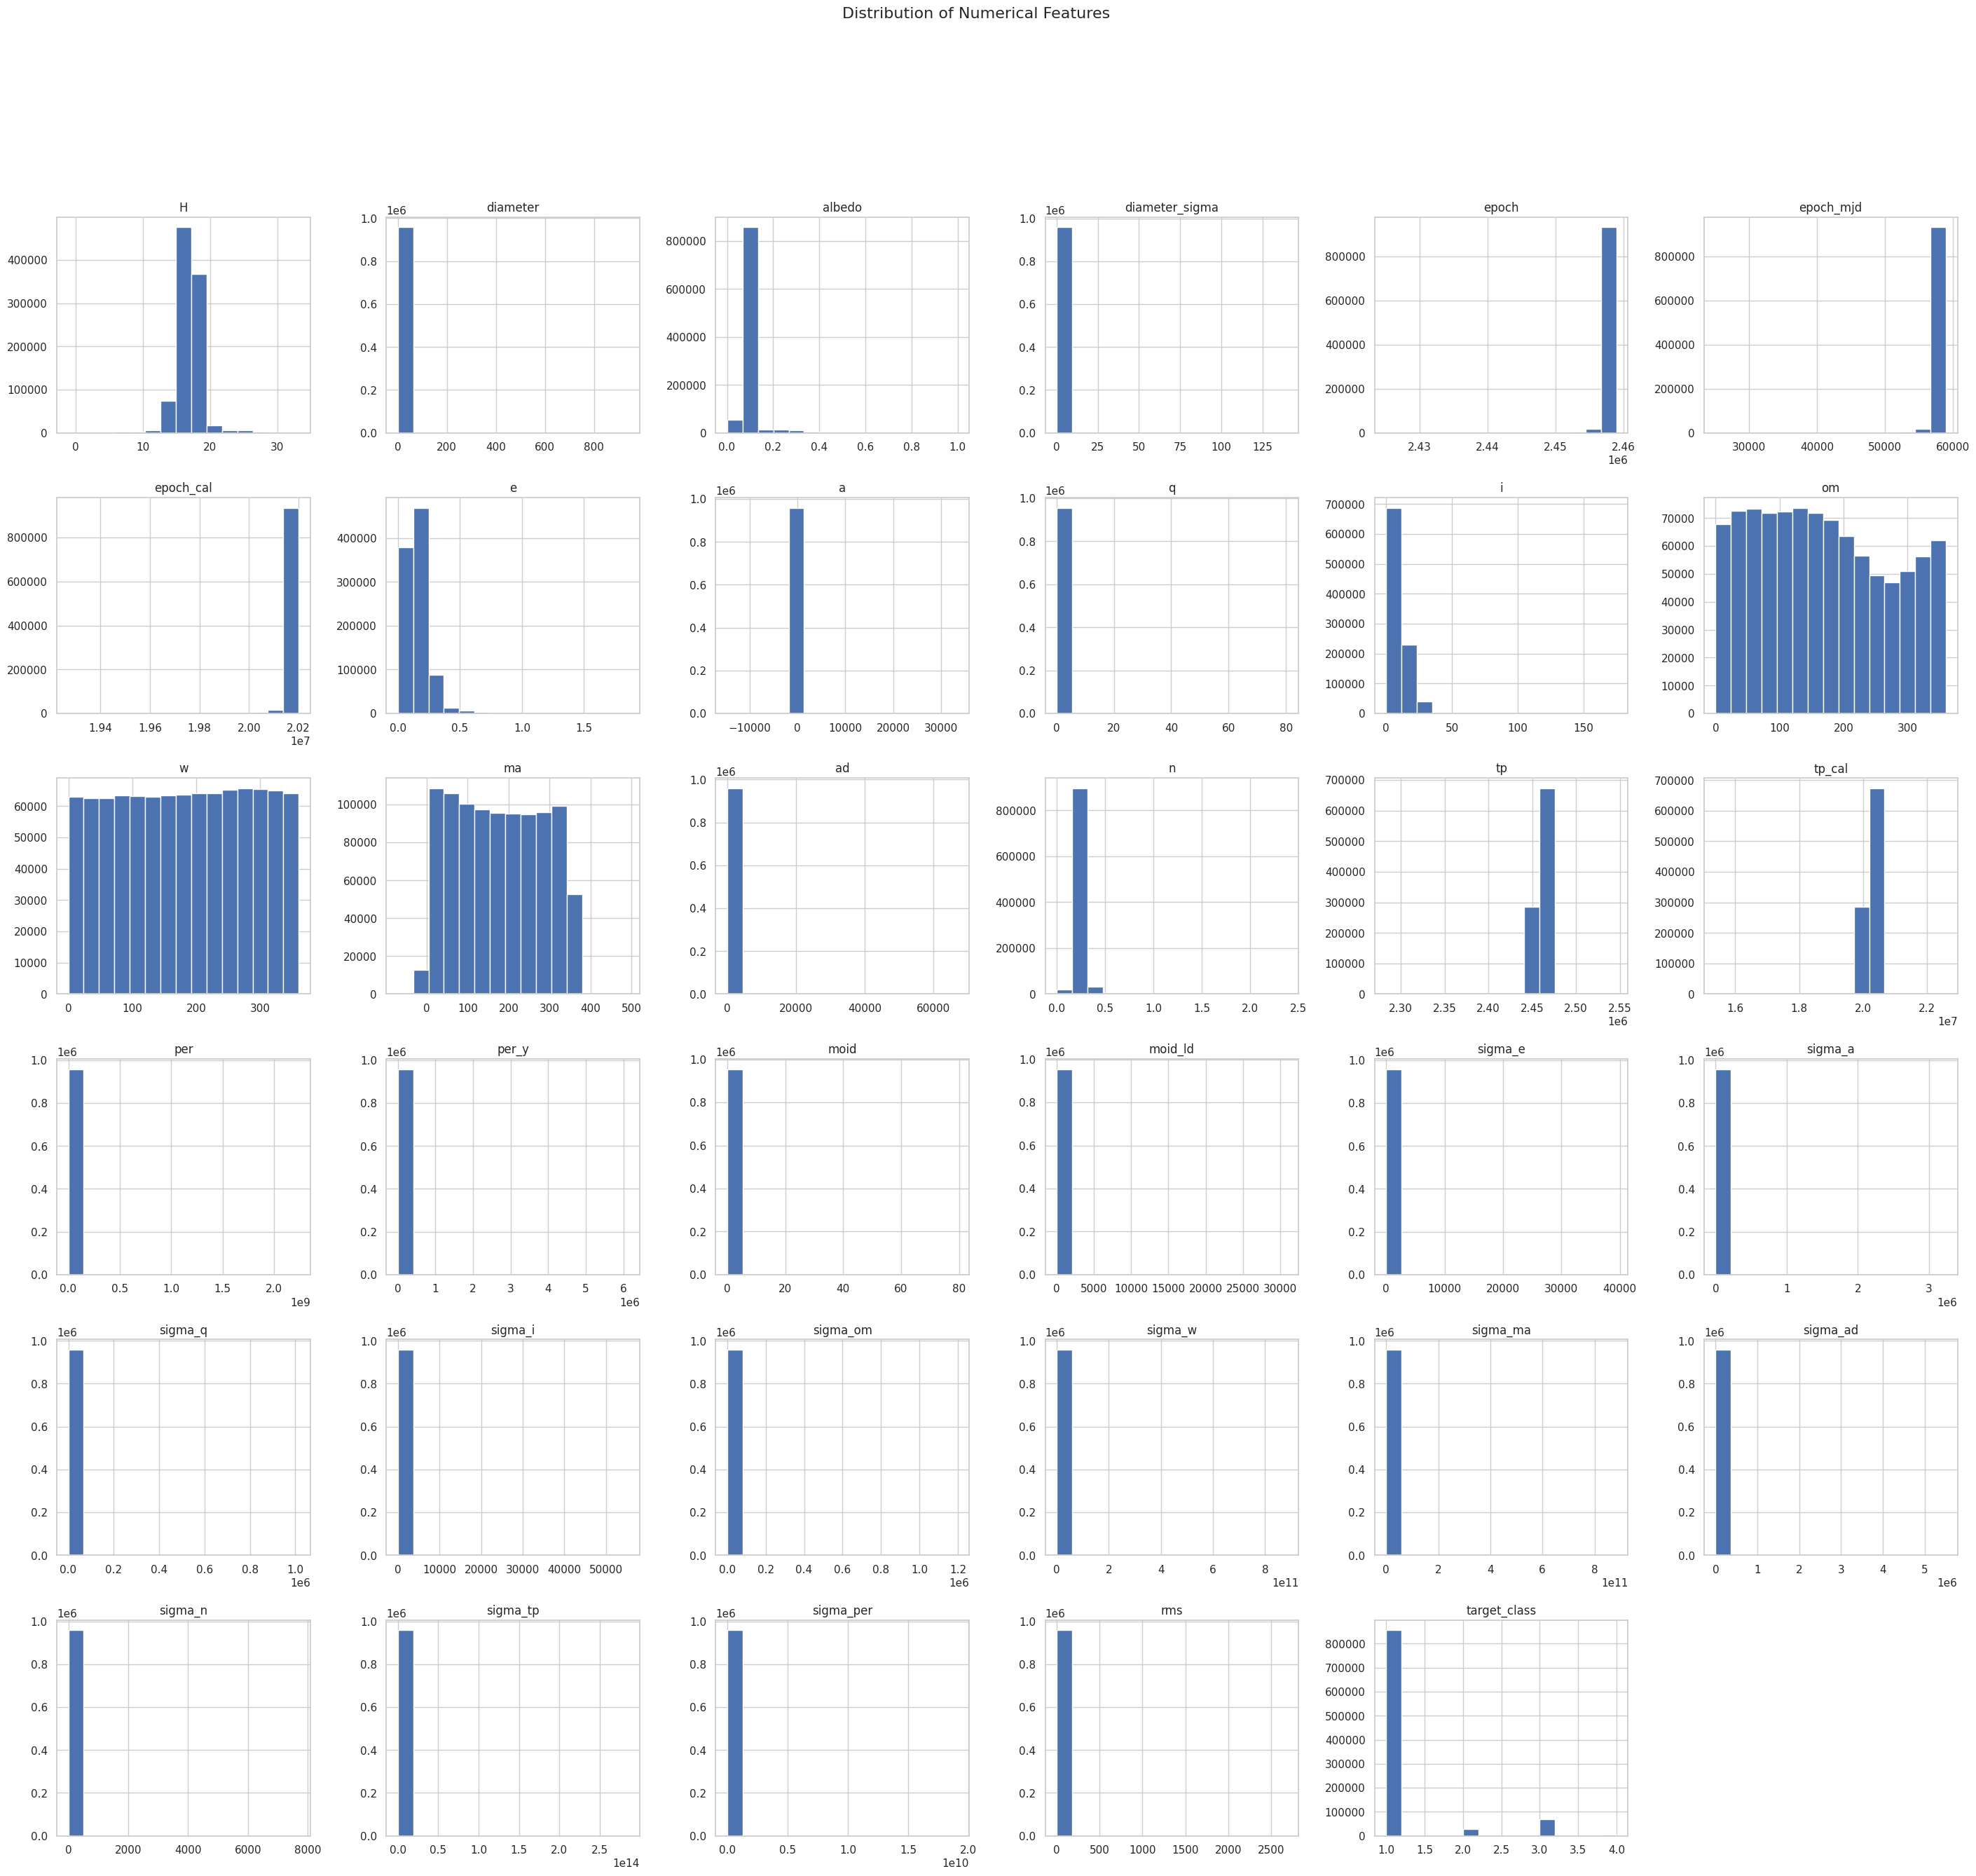

In [ ]:
sns.set(style="whitegrid")

# 7. Distribution of numerical features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(bins=15, figsize=(35, 30))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


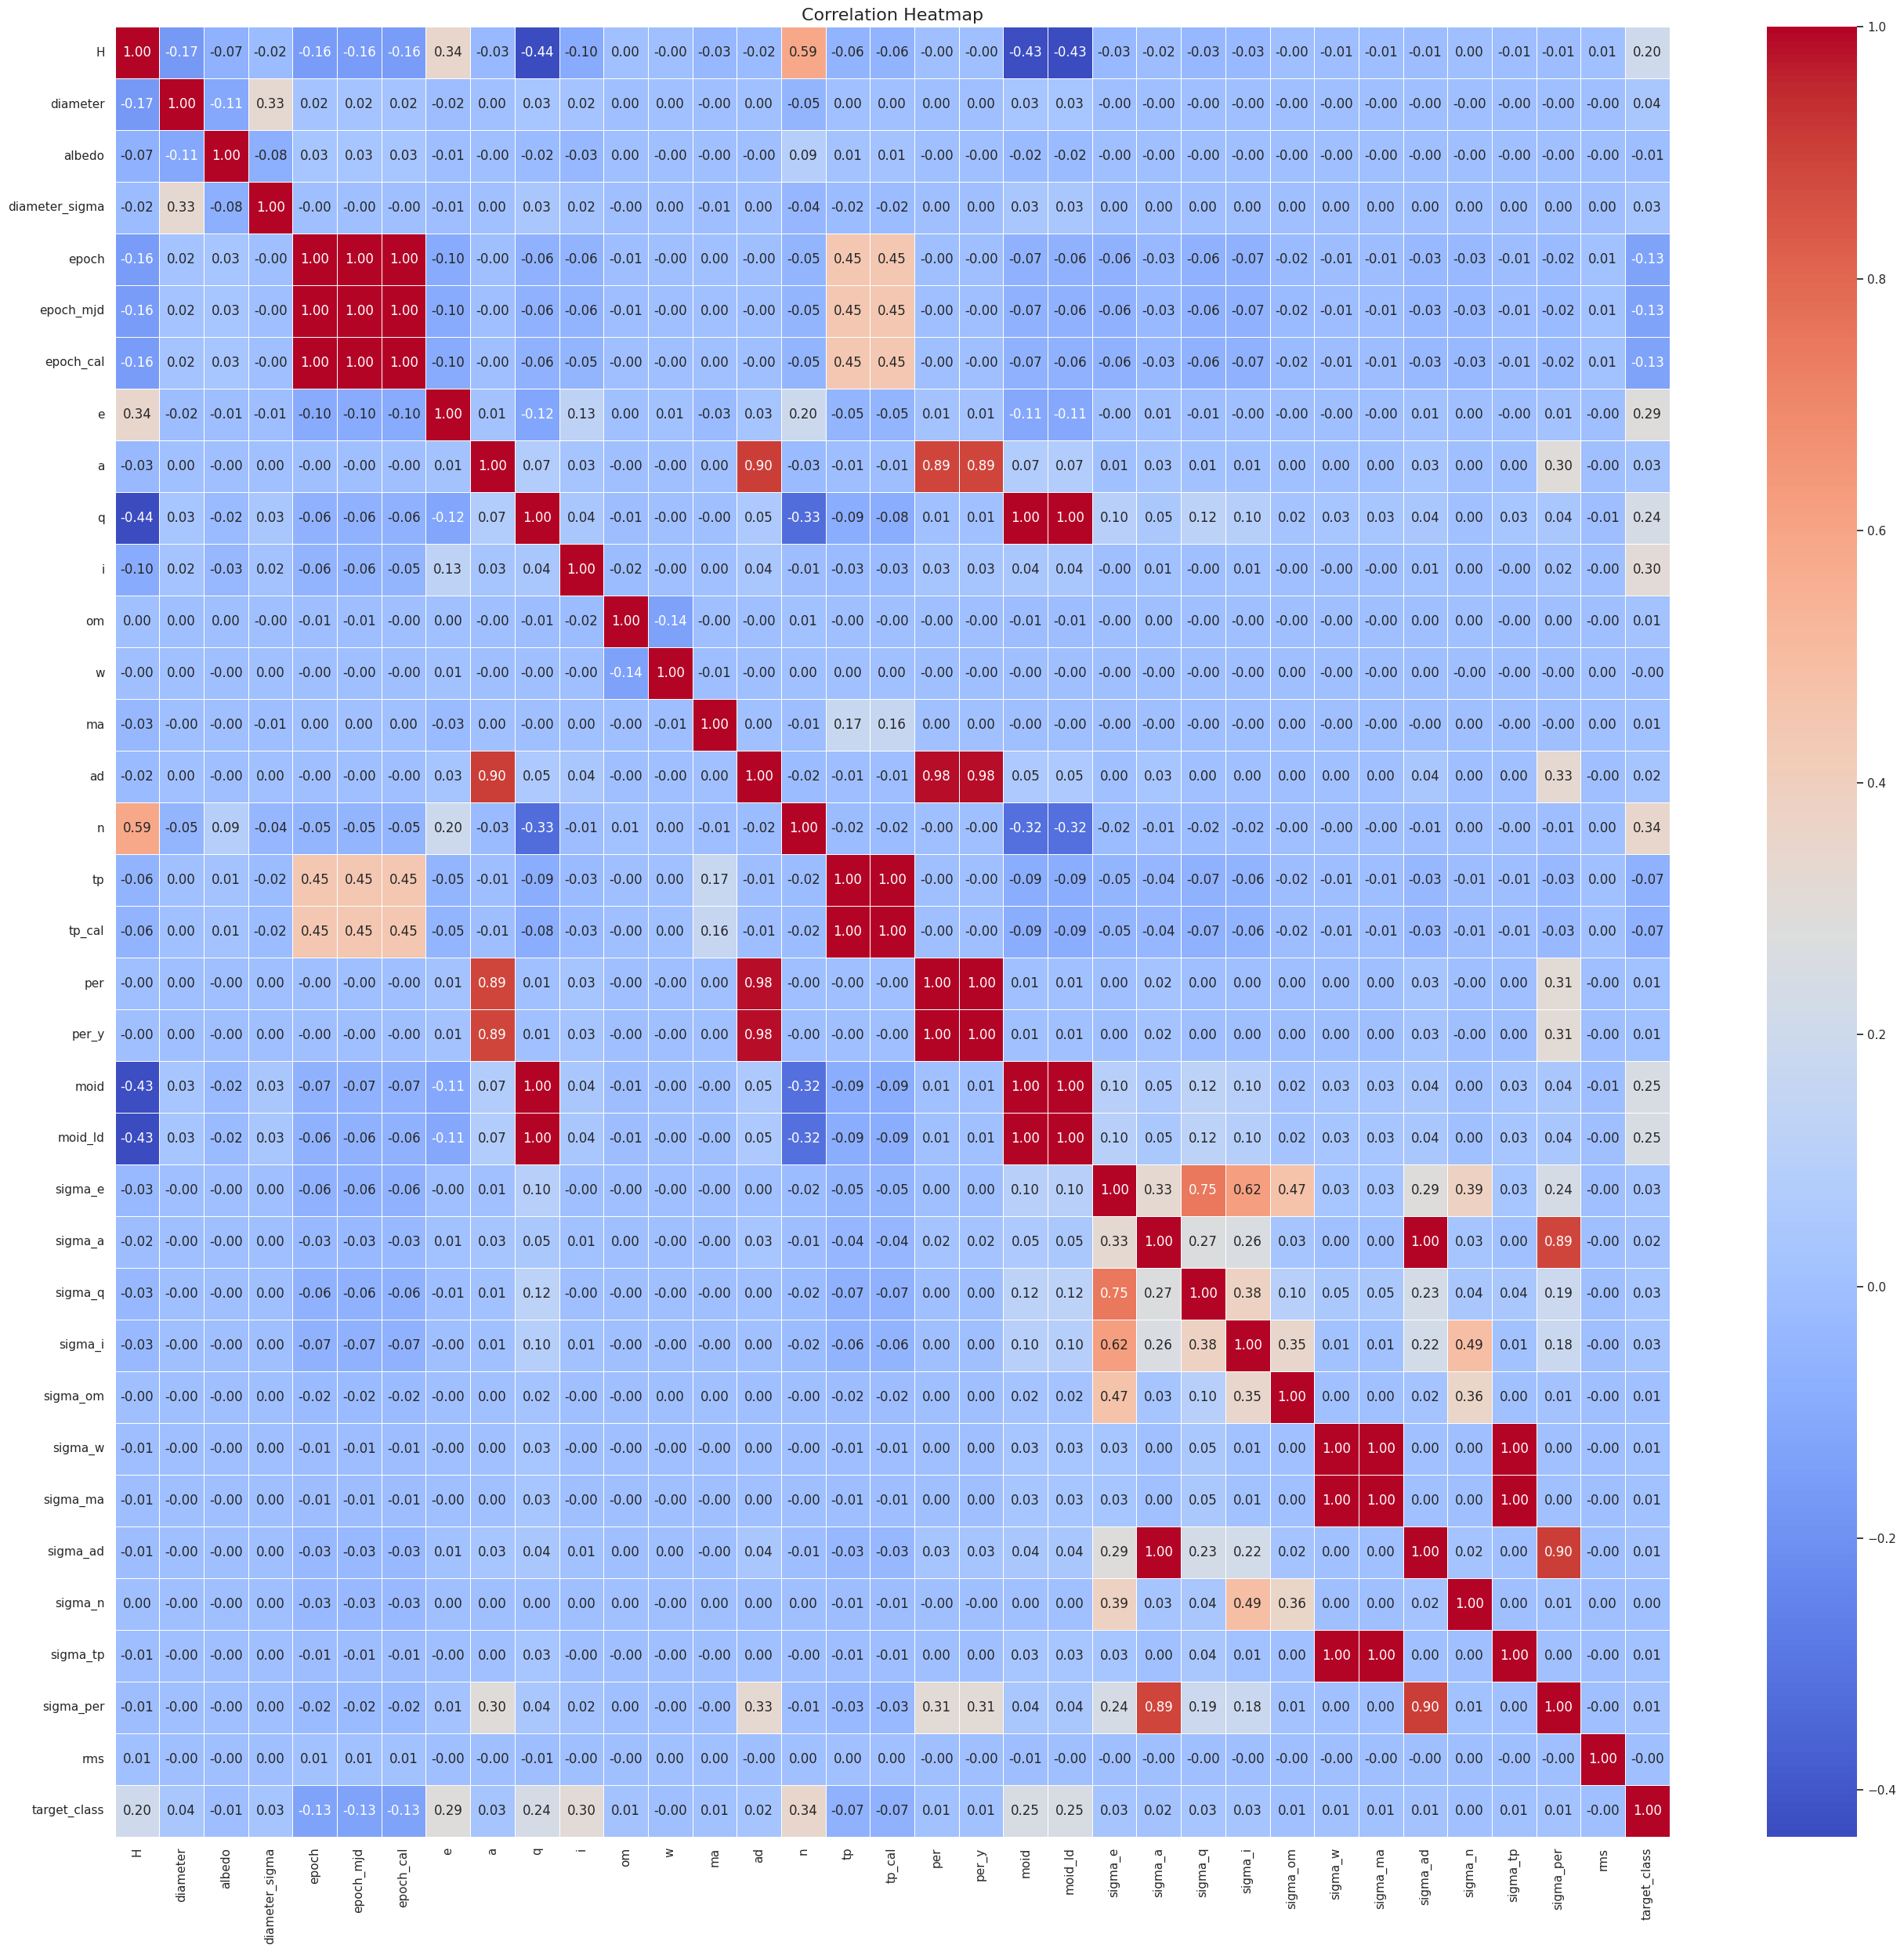

In [ ]:

# 8. Correlation heatmap
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(32, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


In [ ]:

# Prepare features (X) and target (y)
X = df[numerical_columns]  # Features
y = df['target_class']  # Target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for SVM and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



#### Logistic Regression

In [ ]:


# Apply MinMaxScaler
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

# Feature selection
selector = SelectKBest(score_func=chi2, k=10)
X_train_selected = selector.fit_transform(X_train_minmax, y_train)
X_test_selected = selector.transform(X_test_minmax)


# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42, C=0.1)
lr.fit(X_train_selected, y_train)
lr_pred = lr.predict(X_test_selected)

# Evaluation
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_pred))

logistic_confusion= confusion_matrix(y_test, lr_pred)
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           1       0.99      0.72      0.83    171100
           2       0.12      0.88      0.20      5731
           3       0.50      0.79      0.61     13734
           4       0.77      0.93      0.84      1140

    accuracy                           0.73    191705
   macro avg       0.59      0.83      0.62    191705
weighted avg       0.93      0.73      0.80    191705

Logistic Regression Confusion Matrix:
 [[123469  36886  10745      0]
 [   535   5046    150      0]
 [   979   1619  10812    324]
 [     0     38     43   1059]]


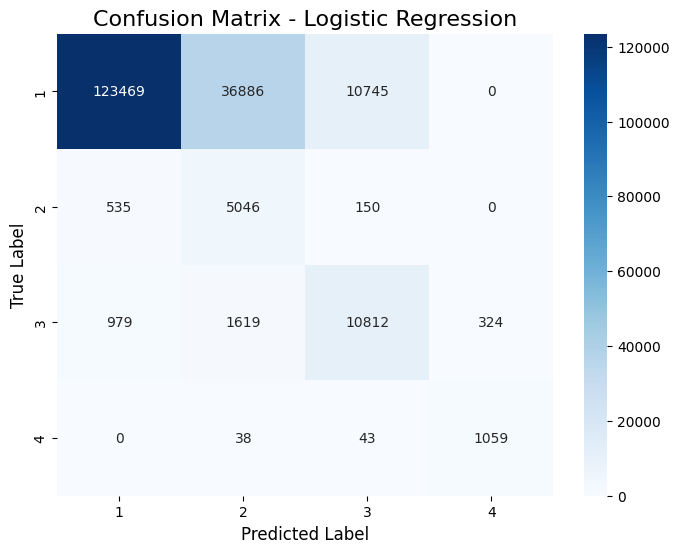

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_confusion, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Logistic Regression", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()

#### Support Vector Machine

In [ ]:
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.1, stratify=y_train, random_state=42)

scaler = StandardScaler()
X_train_small_scaled = scaler.fit_transform(X_train_small)
X_test_scaled_SVM = scaler.transform(X_test)

# f_classif for feature selection, which works with scaled data
selector = SelectKBest(score_func=f_classif, k=10)
X_train_small_selected = selector.fit_transform(X_train_small_scaled, y_train_small)
X_test_selected = selector.transform(X_test_scaled_SVM)


svm = LinearSVC(class_weight='balanced', random_state=42, max_iter=1000)
svm.fit(X_train_small_selected, y_train_small)

svm_pred = svm.predict(X_test_selected)


print("SVM Classification Report:\n", classification_report(y_test, svm_pred))
svm_confusion_matrix= confusion_matrix(y_test, lr_pred)

print("SVM Confusion Matrix:\n", svm_confusion_matrix)


SVM Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.98      0.98    171100
           2       0.72      0.92      0.81      5731
           3       0.87      0.81      0.84     13734
           4       0.98      0.70      0.81      1140

    accuracy                           0.97    191705
   macro avg       0.89      0.85      0.86    191705
weighted avg       0.97      0.97      0.97    191705

SVM Confusion Matrix:
 [[123469  36886  10745      0]
 [   535   5046    150      0]
 [   979   1619  10812    324]
 [     0     38     43   1059]]


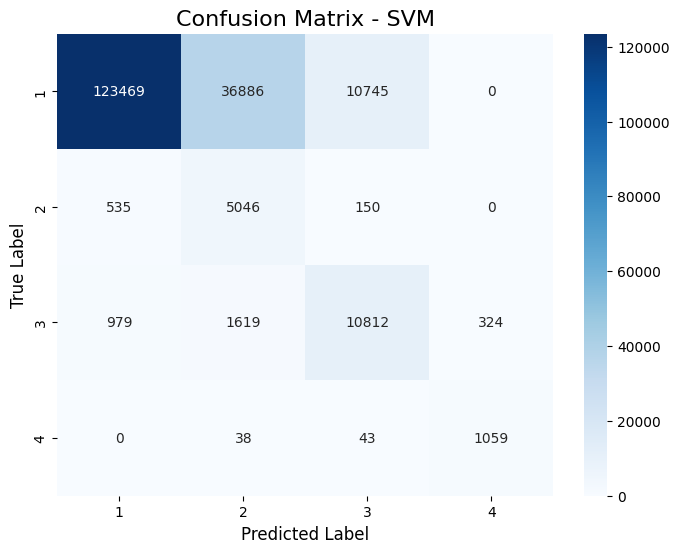

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(svm_confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - SVM", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()

##### When you set class_weight='balanced', the algorithm automatically adjusts the weights of the classes based on their frequency in the dataset. This means that:

- The model will assign higher weights to the under-represented classes (those with fewer samples).
- The model will assign lower weights to the over-represented classes (those with more samples).

#### Neural Network ( ANN Model)

In [ ]:


encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

X_train_scaled = np.array(X_train_scaled, dtype=np.float32)
y_train_encoded = np.array(y_train_encoded, dtype=np.int32)

class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train_encoded),
                                     y=y_train_encoded)

class_weight_dict = dict(enumerate(class_weights))
print("Class weights:", class_weight_dict)

model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_encoded,
                    validation_split=0.2,
                    epochs=5,
                    batch_size=32,
                    class_weight=class_weight_dict,
                    verbose=1)


2024-12-31 09:10:09.220936: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-31 09:10:09.737798: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-31 09:10:09.740754: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-31 09:10:11.246508: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Class weights: {0: 0.27992061081631997, 1: 8.473512641442715, 2: 3.506195588558051, 3: 41.094265809217575}


2024-12-31 09:10:15.117034: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-31 09:10:15.144087: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/5


2024-12-31 09:10:15.403604: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 83429880 exceeds 10% of free system memory.


19171/19171 [==============================] - 51s 3ms/step - loss: 0.2795 - accuracy: 0.9217 - val_loss: 0.0899 - val_accuracy: 0.9596
Epoch 2/5
19171/19171 [==============================] - 49s 3ms/step - loss: 0.1135 - accuracy: 0.9604 - val_loss: 0.0883 - val_accuracy: 0.9720
Epoch 3/5
19171/19171 [==============================] - 50s 3ms/step - loss: 0.0644 - accuracy: 0.9657 - val_loss: 0.1502 - val_accuracy: 0.9402
Epoch 4/5
19171/19171 [==============================] - 48s 2ms/step - loss: 0.0680 - accuracy: 0.9700 - val_loss: 0.1186 - val_accuracy: 0.9609
Epoch 5/5
19171/19171 [==============================] - 48s 3ms/step - loss: 0.1296 - accuracy: 0.9722 - val_loss: 0.0961 - val_accuracy: 0.9751


In [ ]:

y_test_encoded = encoder.fit_transform(y_test)
y_test_encoded = np.array(y_test_encoded, dtype=np.int32)

X_test_scaled = np.array(X_test_scaled, dtype=np.float32)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 0.98


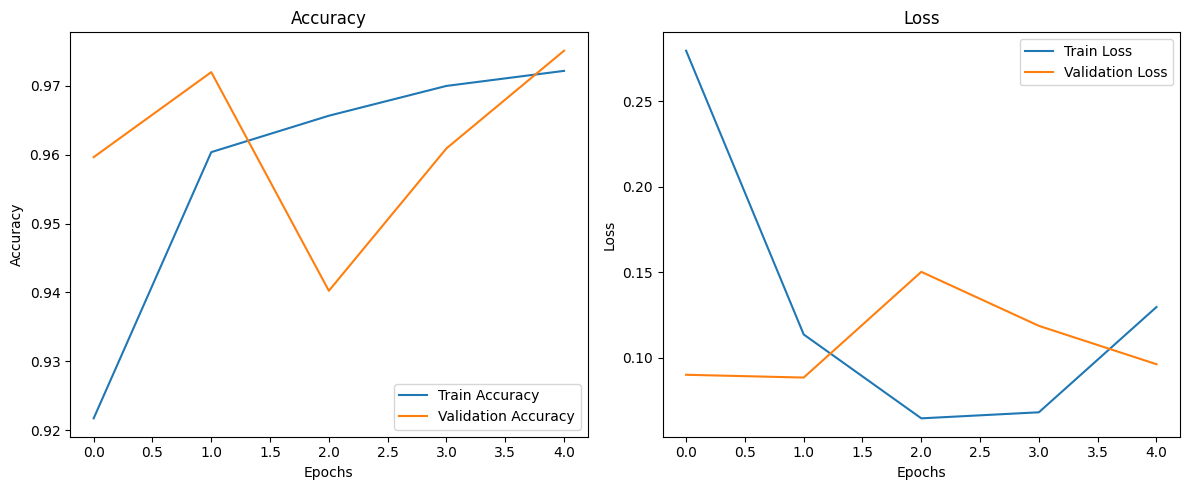

In [ ]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
